In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/valuedcustomer/Desktop/Data_HW6.csv')
df.head()

FileNotFoundError: [Errno 2] File /Users/valuedcustomer/Desktop/Data_HW6.csv does not exist: '/Users/valuedcustomer/Desktop/Data_HW6.csv'

In [10]:
df.describe()

,DEPTH,GR,Rt,RHOB,NPHI
count,233.000000,233.000000,233.000000,233.000000,233.000000
mean,2120.500000,45.496451,43.136386,2529.588644,10.932292
std,8.425686,13.567448,31.652849,72.200716,2.527536
min,2106.000000,18.853000,9.993000,2329.195000,6.264000
25%,2113.250000,39.525000,26.543000,2493.678000,9.158000
50%,2120.500000,43.830000,32.325000,2515.775000,10.853000
75%,2127.750000,53.512000,45.216000,2554.981000,12.061000
max,2135.000000,84.120000,157.828000,2729.732000,21.201000


In [11]:
df['NPHI'] = df['NPHI']/100

In [12]:
%matplotlib inline
def Make_well_logs_plot(logs):
    
# Sort logs by depth

    logs = logs.sort_values(by='DEPTH')
    
    ztop = logs.DEPTH.min(); zbot=logs.DEPTH.max()
        
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
    ax[0].plot(logs.GR, logs.DEPTH, '-', color='darkgreen')
    ax[1].plot(logs.Rt, logs.DEPTH, '-', color='blue')
    ax22 = ax[2].twiny()
    ax22.plot(logs.RHOB, logs.DEPTH, '-', color='red')
    ax23 = ax[2].twiny()
    ax23.plot(logs.NPHI, logs.DEPTH, '-', color='darkgreen')
    
    for i in range (len(ax)):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        
# Set x-axis
        
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(0, 150)
    ax[1].set_xlabel("Rt Ohm.m")
    ax[1].set_xscale('log')
    ax[1].set_xlim(1, 1000)
    ax22.spines['top'].set_position(('outward', 10))
    ax22.set_xlabel("RHOB Kg/m3")
    ax22.set_xlim(1900, 2900)
    ax23.invert_xaxis()
    ax23.spines['top'].set_position(('outward', 50))
    ax23.set_xlabel("NPHI %")
    ax23.set_xlim(0.45, -0.15)
    
# Set y-axis

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([])

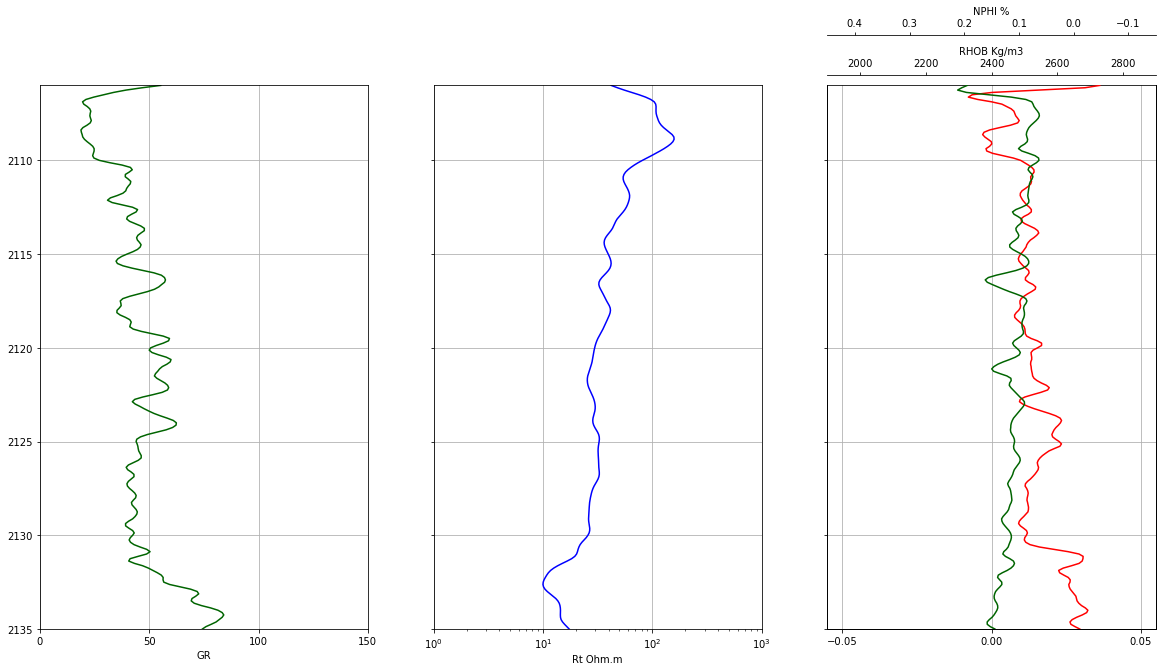

In [13]:
Make_well_logs_plot(df)

In [14]:
def Porosity_Density (den, den_grain, den_fluid):
    Porosity_Density = (den_grain - den)/(den_grain - den_fluid)
    return Porosity_Density

In [15]:
den_grain, den_fluid = 2710, 1000

In [16]:
df['Porosity_Density'] = Porosity_Density (df.RHOB, den_grain, den_fluid)
df['Porosity_Density'][df['Porosity_Density'] < 0] = 0
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919


In [17]:
GR_min = 22
GR_max = 105

In [18]:
df['Vshale'] = ((df.GR - GR_min) / (GR_max - GR_min))
df['Vshale'][df['Vshale'] < 0] = 0
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205


In [19]:
def Porosity_Gaymard (Poro_RHOB, NPHI):
    Porosity_Gaymard = ((Poro_RHOB**2 + NPHI**2)/2)**(1/2)
    return Porosity_Gaymard

In [20]:
df['Porosity_Gaymard'] = Porosity_Gaymard (df.Porosity_Density, df.NPHI)
df['Porosity_Gaymard'][df['Porosity_Gaymard'] < 0] = 0
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105


In [21]:
df['Effective_Porosity'] = df['Porosity_Gaymard'] * (1 - df['Vshale'])
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889


In [22]:
def Formation_Factor (a, Porosity, m):
    Formation_Factor = a*(Porosity)**(-m)
    return Formation_Factor

In [23]:
a, m = 1, 1.9

In [24]:
df['Formation_Factor'] = Formation_Factor(a, df.Effective_Porosity, m)
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295,115.024679
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545,77.152631
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917,48.309421
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650,31.893673
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889,28.380938


In [25]:
def Ashale (Rsh, Rt, Vlam):
    Ashale = ((Rsh - Rt*Vlam)*(1-Vlam))/Rsh
    Ashale[Ashale > 1] = 1
    return Ashale

In [26]:
Rsh = 20

In [27]:
Ashale(Rsh, df.Rt, df.Vshale)

0      0.094121
1      0.198065
2      0.330989
3      0.465737
4      0.616208
         ...   
228    0.130415
229    0.137221
230    0.149385
231    0.162065
232    0.167266
Length: 233, dtype: float64

In [28]:
df['Rt_Ashale'] = df.Rt / Ashale(Rsh, df.Rt, df.Vshale)
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295,115.024679,446.161352
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545,77.152631,241.930393
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917,48.309421,167.068775
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650,31.893673,138.863668
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889,28.380938,122.612738


In [29]:
def Ro (F, Rw):
    Ro = F * Rw
    return Ro

In [30]:
Rw = 0.100

In [31]:
df['Ro'] = Ro(df.Formation_Factor, Rw)
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale,Ro
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295,115.024679,446.161352,11.502468
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545,77.152631,241.930393,7.715263
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917,48.309421,167.068775,4.830942
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650,31.893673,138.863668,3.189367
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889,28.380938,122.612738,2.838094


In [32]:
def Ish (Rt_Ashale, Ro):
    Ish = Rt_Ashale/Ro
    return Ish

In [33]:
df['Ish'] = Ish(df.Rt_Ashale, df.Ro)
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale,Ro,Ish
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295,115.024679,446.161352,11.502468,38.788315
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545,77.152631,241.930393,7.715263,31.357374
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917,48.309421,167.068775,4.830942,34.583063
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650,31.893673,138.863668,3.189367,43.539565
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889,28.380938,122.612738,2.838094,43.202497


In [34]:
def Sw (Ish, n):
    Sw = Ish**(-1/n)
    Sw[Sw > 1] = 1
    return Sw

In [35]:
n = 1.9

In [36]:
df['Sw'] = Sw(df.Ish, n)
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale,Ro,Ish,Sw
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295,115.024679,446.161352,11.502468,38.788315,0.145828
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545,77.152631,241.930393,7.715263,31.357374,0.163100
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917,48.309421,167.068775,4.830942,34.583063,0.154907
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650,31.893673,138.863668,3.189367,43.539565,0.137224
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889,28.380938,122.612738,2.838094,43.202497,0.137786


In [37]:
def Make_well_logs_plot_results(logs):
    
# Sort logs by depth

    logs = logs.sort_values(by='DEPTH')
    
    ztop = logs.DEPTH.min(); zbot=logs.DEPTH.max()
        
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
    ax[0].plot(logs.GR, logs.DEPTH, '-', color='darkgreen')
    ax[1].plot(logs.Vshale, logs.DEPTH, '-', color='magenta')
    ax[2].plot(logs.Effective_Porosity, logs.DEPTH, '-', color='red')
    ax[3].plot(logs.Sw, logs.DEPTH, '-', color='black')
    
    for i in range (len(ax)):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        
# Set x-axis
        
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(0, 150)
    ax[1].set_xlabel("Vshale Fraction")
    ax[1].set_xlim(0, 1)
    ax[2].set_xlabel("Effective_Porosity Fraction")
    ax[2].set_xlim(0.2, 0)
    ax[3].set_xlabel("Sw Fraction")
    ax[3].set_xlim(1, 0)
    
# Set y-axis

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])

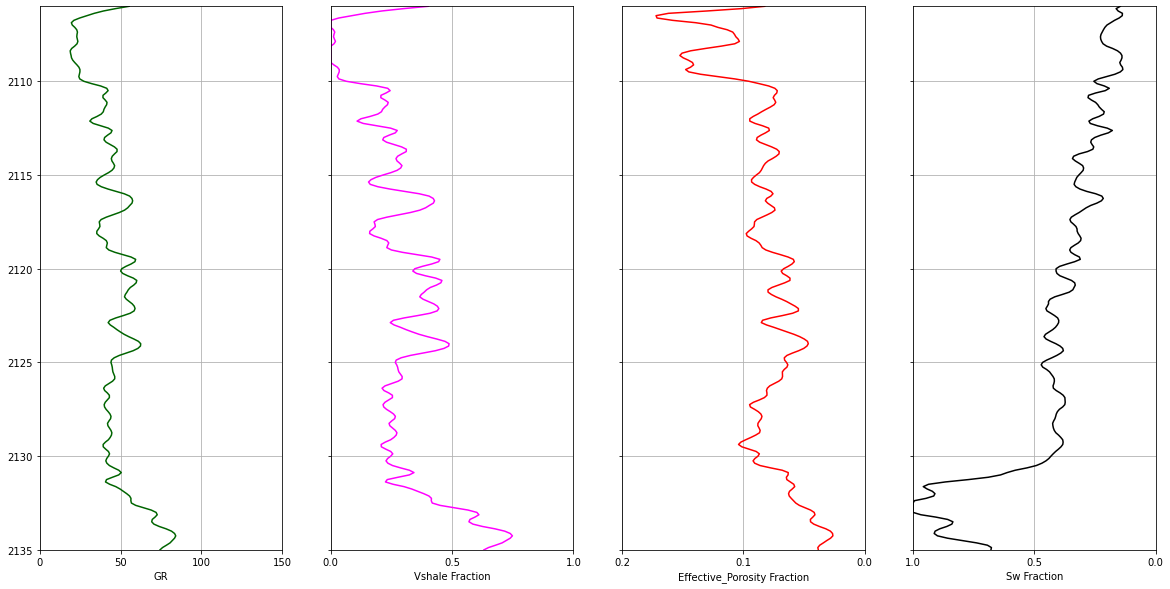

In [38]:
Make_well_logs_plot_results(df)

In [39]:
df.describe()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale,Ro,Ish,Sw
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,2120.500000,45.496451,43.136386,2529.588644,0.109323,0.105553,0.284176,0.111607,0.080919,166.141489,107.858198,16.614149,10.396229,0.403849
std,8.425686,13.567448,31.652849,72.200716,0.025275,0.042091,0.161464,0.017081,0.026719,149.093019,60.566116,14.909302,9.810902,0.215966
min,2106.000000,18.853000,9.993000,2329.195000,0.062640,0.000000,0.000000,0.078522,0.026126,28.380938,21.849132,2.838094,0.905122,0.135289
25%,2113.250000,39.525000,26.543000,2493.678000,0.091580,0.090654,0.211145,0.101090,0.064193,95.831461,66.174062,9.583146,4.929102,0.259507
50%,2120.500000,43.830000,32.325000,2515.775000,0.108530,0.113582,0.263012,0.109154,0.079622,122.472327,98.926202,12.247233,6.740789,0.366300
75%,2127.750000,53.512000,45.216000,2554.981000,0.120610,0.126504,0.379663,0.117249,0.090594,184.407170,137.382855,18.440717,12.975242,0.431902
max,2135.000000,84.120000,157.828000,2729.732000,0.212010,0.222693,0.748434,0.188290,0.171889,1017.600328,446.161352,101.760033,44.730402,1.000000


In [88]:
df2 = pd.read_csv('/Users/valuedcustomer/Desktop/Data2_HW7.csv')
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m
0,2106.000,55.315,41.993,2729.732,19.442,218.239
1,2106.125,46.849,47.918,2684.776,20.444,225.859
2,2106.250,39.440,55.298,2546.362,21.201,236.457
3,2106.375,33.743,64.674,2401.586,19.590,244.900
4,2106.500,29.155,75.555,2340.779,15.539,251.914


In [90]:
df2['Delta_tc_ft'] = df2['Delta_tc_m']*0.3048
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387


In [49]:
def Vc (tc_m):
    Vc = (1/tc_m)*1000000
    return Vc

In [91]:
df2['Vc_m/sec'] = Vc(df2['Delta_tc_m'])
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676


In [93]:
def Dtshear (tc_ft):
    Dtshear = (tc_ft-20.408922)/(0.422373)
    return Dtshear

In [94]:
df2['Dtshear_ft'] = Dtshear(df2['Delta_tc_ft'])
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807


In [95]:
df2['Dtshear_m'] = (df2['Dtshear_ft'])/0.3048
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349


In [96]:
def Vs (Dtshear):
    Vs = (1/Dtshear)*1000000
    return Vs

In [97]:
df2['Vs_m/sec'] = Vs(df2['Dtshear_m'])
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,Vs_m/sec
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,2791.984004
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,2658.095782
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,2491.896769
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,2373.660870
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,2283.645440


In [56]:
def v (Vc, Vs):
    v = (0.5*(Vc**2)-(Vs**2))/((Vc**2)-(Vs**2))
    return v

In [98]:
df2['v'] = v(df2['Vc_m/sec'], df2['Vs_m/sec'])
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,Vs_m/sec,v
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,2791.984004,0.204745
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,2658.095782,0.218230
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,2491.896769,0.234083
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,2373.660870,0.244803
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,2283.645440,0.252672


In [99]:
df2['v_static'] = 0.9857 * df2['v']
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,Vs_m/sec,v,v_static
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,2791.984004,0.204745,0.201817
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,2658.095782,0.218230,0.215109
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,2491.896769,0.234083,0.230736
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,2373.660870,0.244803,0.241303
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,2283.645440,0.252672,0.249059


In [59]:
def G (RHOB, Dtshear):
    G = ((1.34*10000000000*RHOB)/1000)/(Dtshear**2)
    return G

In [100]:
df2['G_psi'] = G(df2['RHOB'], df2['Dtshear_ft'])
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,Vs_m/sec,v,v_static,G_psi
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,2791.984004,0.204745,0.201817,3.069169e+06
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,2658.095782,0.218230,0.215109,2.736051e+06
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,2491.896769,0.234083,0.230736,2.280631e+06
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,2373.660870,0.244803,0.241303,1.951688e+06
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,2283.645440,0.252672,0.249059,1.760729e+06


In [116]:
df2['G_Kpa'] = (df2['G_psi']*101.325)/14.7
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,...,v_static,G_psi,E_psi,E_Kpa,E_static_Kpa,BRIT,Biot_v,sz_psi,sz_Kpa,G_Kpa
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,...,0.201817,3.069169e+06,7.395133e+06,5.097359e+07,4.123764e+07,0.709161,0.682295,6909.448819,47625.843645,2.115534e+07
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,...,0.215109,2.736051e+06,6.666277e+06,4.594970e+07,3.717330e+07,0.647995,0.701545,6909.858924,47628.670440,1.885921e+07
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,...,0.230736,2.280631e+06,5.628977e+06,3.879973e+07,3.138898e+07,0.565648,0.729917,6910.269029,47631.497235,1.572007e+07
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,...,0.241303,1.951688e+06,4.858935e+06,3.349195e+07,2.709498e+07,0.505995,0.761650,6910.679134,47634.324030,1.345271e+07
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,...,0.249059,1.760729e+06,4.411233e+06,3.040600e+07,2.459845e+07,0.469007,0.771889,6911.089239,47637.150825,1.213646e+07


In [62]:
def E (G_psi, v):
    E = 2*G_psi*(1+v)
    return E

In [104]:
df2['E_psi'] = E(df2['G_psi'], df2['v'])
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,Vs_m/sec,v,v_static,G_psi,E_psi
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,2791.984004,0.204745,0.201817,3.069169e+06,7.395133e+06
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,2658.095782,0.218230,0.215109,2.736051e+06,6.666277e+06
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,2491.896769,0.234083,0.230736,2.280631e+06,5.628977e+06
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,2373.660870,0.244803,0.241303,1.951688e+06,4.858935e+06
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,2283.645440,0.252672,0.249059,1.760729e+06,4.411233e+06


In [105]:
df2['E_Kpa'] = (df2['E_psi']*101.325)/14.7
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,Vs_m/sec,v,v_static,G_psi,E_psi,E_Kpa
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,2791.984004,0.204745,0.201817,3.069169e+06,7.395133e+06,5.097359e+07
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,2658.095782,0.218230,0.215109,2.736051e+06,6.666277e+06,4.594970e+07
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,2491.896769,0.234083,0.230736,2.280631e+06,5.628977e+06,3.879973e+07
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,2373.660870,0.244803,0.241303,1.951688e+06,4.858935e+06,3.349195e+07
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,2283.645440,0.252672,0.249059,1.760729e+06,4.411233e+06,3.040600e+07


In [106]:
df2['E_static_Kpa'] = 0.809 * df2['E_Kpa']
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,Vs_m/sec,v,v_static,G_psi,E_psi,E_Kpa,E_static_Kpa
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,2791.984004,0.204745,0.201817,3.069169e+06,7.395133e+06,5.097359e+07,4.123764e+07
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,2658.095782,0.218230,0.215109,2.736051e+06,6.666277e+06,4.594970e+07,3.717330e+07
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,2491.896769,0.234083,0.230736,2.280631e+06,5.628977e+06,3.879973e+07,3.138898e+07
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,2373.660870,0.244803,0.241303,1.951688e+06,4.858935e+06,3.349195e+07,2.709498e+07
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,2283.645440,0.252672,0.249059,1.760729e+06,4.411233e+06,3.040600e+07,2.459845e+07


In [66]:
def BRIT (E_static_Kpa, v_static):
    BRIT = 0.0715 * ((E_static_Kpa*14.7)/(101.325*1000000)) - 1.43 * v_static + 0.57
    return BRIT

In [107]:
df2['BRIT'] = BRIT(df2['E_static_Kpa'], df2['v_static'])
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,Vs_m/sec,v,v_static,G_psi,E_psi,E_Kpa,E_static_Kpa,BRIT
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,2791.984004,0.204745,0.201817,3.069169e+06,7.395133e+06,5.097359e+07,4.123764e+07,0.709161
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,2658.095782,0.218230,0.215109,2.736051e+06,6.666277e+06,4.594970e+07,3.717330e+07,0.647995
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,2491.896769,0.234083,0.230736,2.280631e+06,5.628977e+06,3.879973e+07,3.138898e+07,0.565648
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,2373.660870,0.244803,0.241303,1.951688e+06,4.858935e+06,3.349195e+07,2.709498e+07,0.505995
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,2283.645440,0.252672,0.249059,1.760729e+06,4.411233e+06,3.040600e+07,2.459845e+07,0.469007


In [68]:
def Biot_v (ma, effective_porosity):
    Biot_v = 0.6 + (ma * effective_porosity)
    return Biot_v

In [108]:
ma = 1

df2['Biot_v'] = Biot_v(ma, df['Effective_Porosity'])
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,Vs_m/sec,v,v_static,G_psi,E_psi,E_Kpa,E_static_Kpa,BRIT,Biot_v
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,2791.984004,0.204745,0.201817,3.069169e+06,7.395133e+06,5.097359e+07,4.123764e+07,0.709161,0.682295
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,2658.095782,0.218230,0.215109,2.736051e+06,6.666277e+06,4.594970e+07,3.717330e+07,0.647995,0.701545
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,2491.896769,0.234083,0.230736,2.280631e+06,5.628977e+06,3.879973e+07,3.138898e+07,0.565648,0.729917
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,2373.660870,0.244803,0.241303,1.951688e+06,4.858935e+06,3.349195e+07,2.709498e+07,0.505995,0.761650
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,2283.645440,0.252672,0.249059,1.760729e+06,4.411233e+06,3.040600e+07,2.459845e+07,0.469007,0.771889


In [70]:
def sz (depth, overburder):
    sz = (depth/0.3048) * overburder
    return sz

In [109]:
overburder = 1 #psi/ft

df2['sz_psi'] = sz(df2['Depth'], overburder)
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,Vs_m/sec,v,v_static,G_psi,E_psi,E_Kpa,E_static_Kpa,BRIT,Biot_v,sz_psi
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,2791.984004,0.204745,0.201817,3.069169e+06,7.395133e+06,5.097359e+07,4.123764e+07,0.709161,0.682295,6909.448819
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,2658.095782,0.218230,0.215109,2.736051e+06,6.666277e+06,4.594970e+07,3.717330e+07,0.647995,0.701545,6909.858924
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,2491.896769,0.234083,0.230736,2.280631e+06,5.628977e+06,3.879973e+07,3.138898e+07,0.565648,0.729917,6910.269029
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,2373.660870,0.244803,0.241303,1.951688e+06,4.858935e+06,3.349195e+07,2.709498e+07,0.505995,0.761650,6910.679134
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,2283.645440,0.252672,0.249059,1.760729e+06,4.411233e+06,3.040600e+07,2.459845e+07,0.469007,0.771889,6911.089239


In [110]:
df2['sz_Kpa'] = (df2['sz_psi']*101.325)/14.7
df2.head()

,Depth,Gamma_Ray,TRUE,RHOB,NPHI,Delta_tc_m,Delta_tc_ft,Vc_m/sec,Dtshear_ft,Dtshear_m,...,v,v_static,G_psi,E_psi,E_Kpa,E_static_Kpa,BRIT,Biot_v,sz_psi,sz_Kpa
0,2106.000,55.315,41.993,2729.732,19.442,218.239,66.519247,4582.132433,109.169680,358.168241,...,0.204745,0.201817,3.069169e+06,7.395133e+06,5.097359e+07,4.123764e+07,0.709161,0.682295,6909.448819,47625.843645
1,2106.125,46.849,47.918,2684.776,20.444,225.859,68.841823,4427.541077,114.668554,376.209167,...,0.218230,0.215109,2.736051e+06,6.666277e+06,4.594970e+07,3.717330e+07,0.647995,0.701545,6909.858924,47628.670440
2,2106.250,39.440,55.298,2546.362,21.201,236.457,72.072094,4229.098737,122.316463,401.300733,...,0.234083,0.230736,2.280631e+06,5.628977e+06,3.879973e+07,3.138898e+07,0.565648,0.729917,6910.269029,47631.497235
3,2106.375,33.743,64.674,2401.586,19.590,244.900,74.645520,4083.299306,128.409245,421.290174,...,0.244803,0.241303,1.951688e+06,4.858935e+06,3.349195e+07,2.709498e+07,0.505995,0.761650,6910.679134,47634.324030
4,2106.500,29.155,75.555,2340.779,15.539,251.914,76.783387,3969.608676,133.470807,437.896349,...,0.252672,0.249059,1.760729e+06,4.411233e+06,3.040600e+07,2.459845e+07,0.469007,0.771889,6911.089239,47637.150825


In [115]:
def Make_well_logs_plot_results_geomechanics(logs2):
    
# Sort logs by depth

    logs2 = logs2.sort_values(by='Depth')
    
    ztop = logs2.Depth.min(); zbot=logs2.Depth.max()
        
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
    ax[0].plot(logs2.Gamma_Ray, logs2.Depth, '-', color='darkgreen')
    ax[1].plot(logs2.v, logs2.Depth, '-', color='magenta')
    ax[2].plot(logs2.G_Kpa, logs2.Depth, '-', color='blue')
    ax[3].plot(logs2.E_Kpa, logs2.Depth, '-', color='black')
    ax[4].plot(logs2.BRIT, logs2.Depth, '-', color='black')
    
    for i in range (len(ax)):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        
# Set x-axis
        
    ax[0].set_xlabel("Gamma_Ray")
    ax[0].set_xlim(0,150)
    ax[1].set_xlabel("Dynamic Poisson's Ratio")
    ax[1].set_xlim(logs2.v.min(),logs2.v.max())
    ax[2].set_xlabel("Dynamic Shear Modulus")
    ax[2].set_xlim(logs2.G_Kpa.min(),logs2.G_Kpa.max())
    ax[3].set_xlabel("Dynamic Young's Modulus")
    ax[3].set_xlim(logs2.E_Kpa.min(),logs2.E_Kpa.max())
    ax[4].set_xlabel("Brittleness Index")
    ax[4].set_xlim(0,1)
    
# Set y-axis

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]); ax[4].set_yticklabels([])

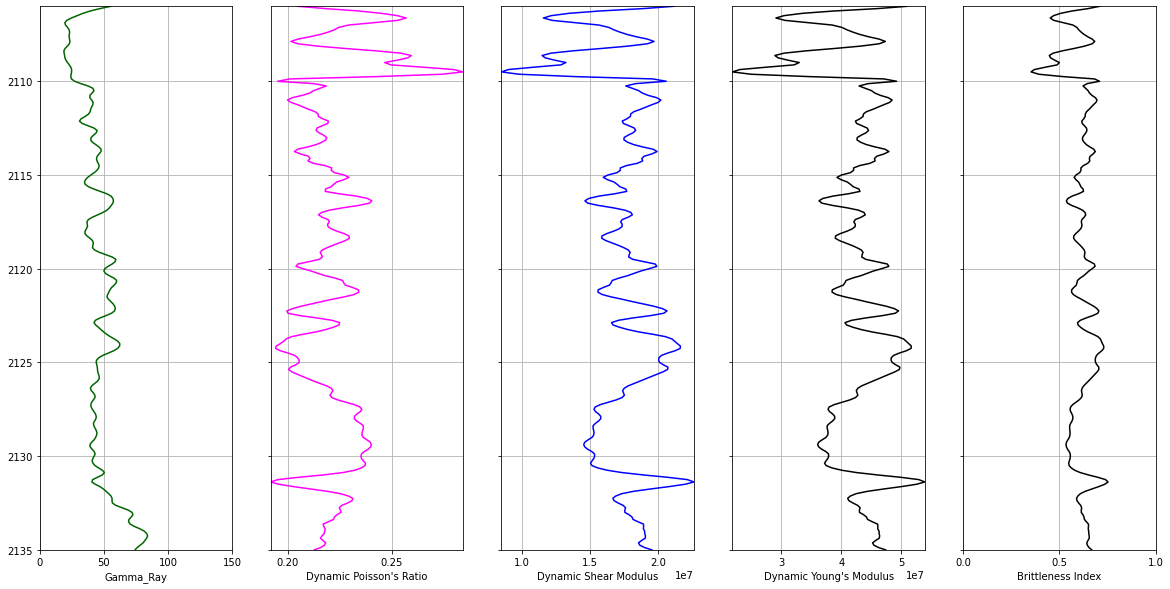

In [117]:
Make_well_logs_plot_results_geomechanics(df2)